In [1]:
import numpy as np
from numpy import inf
import scipy as sci
from scipy import interpolate
from scipy.optimize import least_squares
import pandas as pd
import copy
import numpy.ma as ma
import ipywidgets as widgets
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def fun1(x,a,b):
    return a+b*(1-np.cos(np.pi/(x+1)))

In [3]:
def fun2(x,a,b,c):
    return a*(1-1/x)+b*(x+1)/(x+c)**2

In [2]:
def fun3(x,a,b,c):
    return a+b*(1-np.cos(np.pi/(x+1)))+2*c*(1-np.cos(2*np.pi/(x+1)))
#(2*c/(x+1))

In [8]:
VacSolData=np.genfromtxt("OT.txt")
x=np.arange(2,7)
xs=np.array([2,3,4,6])

ySol0=copy.deepcopy(VacSolData[0,:])
ySol1=copy.deepcopy(VacSolData[1,:])
ySol2=copy.deepcopy(VacSolData[2,:])
ySol3=copy.deepcopy(VacSolData[3,:])
ySolExp=copy.deepcopy(VacSolData[4,:])

ycaSol0=copy.deepcopy(VacSolData[5,:])
ycaSol1=copy.deepcopy(VacSolData[6,:])
ycaSol2=copy.deepcopy(VacSolData[7,:])
ycaSol3=copy.deepcopy(VacSolData[8,:])
ycaSolExp=copy.deepcopy(VacSolData[9,:])

yanSol0=copy.deepcopy(VacSolData[10,:])
yanSol1=copy.deepcopy(VacSolData[11,:])
yanSol2=copy.deepcopy(VacSolData[12,:])
yanSol3=copy.deepcopy(VacSolData[13,:])

yanSolExp=np.array([2.58,2.06,1.82,1.59])

yemSol1=copy.deepcopy(VacSolData[15,:])
yemSol2=copy.deepcopy(VacSolData[16,:])
yemSol3=copy.deepcopy(VacSolData[17,:])
yemSolExp=copy.deepcopy(VacSolData[18,:])

In [9]:
p2=np.array([4,1,10])

#,p0=p2,bounds=([0,-10,0],40)
poptSol01,pcovSol01=curve_fit(fun1,x,ySol0)
poptSol02,pcovSol02=curve_fit(fun2,x,ySol0)
poptSol11,pcovSol11=curve_fit(fun1,x,ySol1)
poptSol12,pcovSol12=curve_fit(fun2,x,ySol1)
poptSol21,pcovSol21=curve_fit(fun1,x,ySol2)
poptSol22,pcovSol22=curve_fit(fun2,x,ySol2)
poptSol31,pcovSol31=curve_fit(fun1,x,ySol3)
poptSol32,pcovSol32=curve_fit(fun2,x,ySol3)

poptSolExp1,pcovSolExp1=curve_fit(fun1,x,ySolExp)
poptSolExp2,pcovSolExp2=curve_fit(fun2,x,ySolExp)

#
poptcaSol01,pcovcaSol01=curve_fit(fun1,x,ycaSol0)
poptcaSol02,pcovcaSol02=curve_fit(fun2,x,ycaSol0)
poptcaSol11,pcovcaSol11=curve_fit(fun1,x,ycaSol1)
poptcaSol12,pcovcaSol12=curve_fit(fun2,x,ycaSol1)
poptcaSol21,pcovcaSol21=curve_fit(fun1,x,ycaSol2)
poptcaSol22,pcovcaSol22=curve_fit(fun2,x,ycaSol2)
poptcaSol31,pcovcaSol31=curve_fit(fun1,x,ycaSol3)
poptcaSol32,pcovcaSol32=curve_fit(fun2,x,ycaSol3)

poptcaSolExp1,pcovcaSolExp1=curve_fit(fun1,x,ycaSolExp)
poptcaSolExp2,pcovcaSolExp2=curve_fit(fun2,x,ycaSolExp)

#
poptanSol01,pcovanSol01=curve_fit(fun1,x,yanSol0)
poptanSol02,pcovanSol02=curve_fit(fun2,x,yanSol0)
poptanSol11,pcovanSol11=curve_fit(fun1,x,yanSol1)
poptanSol12,pcovanSol12=curve_fit(fun2,x,yanSol1)
poptanSol21,pcovanSol21=curve_fit(fun1,x,yanSol2)
poptanSol22,pcovanSol22=curve_fit(fun2,x,yanSol2)
poptanSol31,pcovanSol31=curve_fit(fun1,x,yanSol3)
poptanSol32,pcovanSol32=curve_fit(fun2,x,yanSol3)

poptanSolExp1,pcovanSolExp1=curve_fit(fun1,xs,yanSolExp)
poptanSolExp2,pcovanSolExp2=curve_fit(fun2,xs,yanSolExp)

#
poptemSol11,pcovemSol11=curve_fit(fun1,x,yemSol1)
poptemSol12,pcovemSol12=curve_fit(fun2,x,yemSol1)
poptemSol21,pcovemSol21=curve_fit(fun1,x,yemSol2)
poptemSol22,pcovemSol22=curve_fit(fun2,x,yemSol2)
poptemSol31,pcovemSol31=curve_fit(fun1,x,yemSol3)
poptemSol32,pcovemSol32=curve_fit(fun2,x,yemSol3)

poptemSolExp1,pcovemSolExp1=curve_fit(fun1,x,yemSolExp)
poptemSolExp2,pcovemSolExp2=curve_fit(fun2,x,yemSolExp)

In [10]:
perrSol01=np.sqrt(np.diag(pcovSol01))
perrSol02=np.sqrt(np.diag(pcovSol02))
perrSol11=np.sqrt(np.diag(pcovSol11))
perrSol12=np.sqrt(np.diag(pcovSol12))
perrSol21=np.sqrt(np.diag(pcovSol21))
perrSol22=np.sqrt(np.diag(pcovSol22))
perrSol31=np.sqrt(np.diag(pcovSol31))
perrSol32=np.sqrt(np.diag(pcovSol32))

perrSolExp1=np.sqrt(np.diag(pcovSolExp1))
perrSolExp2=np.sqrt(np.diag(pcovSolExp2))

#
perrcaSol01=np.sqrt(np.diag(pcovcaSol01))
perrcaSol02=np.sqrt(np.diag(pcovcaSol02))
perrcaSol11=np.sqrt(np.diag(pcovcaSol11))
perrcaSol12=np.sqrt(np.diag(pcovcaSol12))
perrcaSol21=np.sqrt(np.diag(pcovcaSol21))
perrcaSol22=np.sqrt(np.diag(pcovcaSol22))
perrcaSol31=np.sqrt(np.diag(pcovcaSol31))
perrcaSol32=np.sqrt(np.diag(pcovcaSol32))

perrcaSolExp1=np.sqrt(np.diag(pcovcaSolExp1))
perrcaSolExp2=np.sqrt(np.diag(pcovcaSolExp2))

#
perranSol01=np.sqrt(np.diag(pcovanSol01))
perranSol02=np.sqrt(np.diag(pcovanSol02))
perranSol11=np.sqrt(np.diag(pcovanSol11))
perranSol12=np.sqrt(np.diag(pcovanSol12))
perranSol21=np.sqrt(np.diag(pcovanSol21))
perranSol22=np.sqrt(np.diag(pcovanSol22))
perranSol31=np.sqrt(np.diag(pcovanSol31))
perranSol32=np.sqrt(np.diag(pcovanSol32))

perranSolExp1=np.sqrt(np.diag(pcovanSolExp1))
perranSolExp2=np.sqrt(np.diag(pcovanSolExp2))

#
perremSol11=np.sqrt(np.diag(pcovemSol11))
perremSol12=np.sqrt(np.diag(pcovemSol12))
perremSol21=np.sqrt(np.diag(pcovemSol21))
perremSol22=np.sqrt(np.diag(pcovemSol22))
perremSol31=np.sqrt(np.diag(pcovemSol31))
perremSol32=np.sqrt(np.diag(pcovemSol32))

perremSolExp1=np.sqrt(np.diag(pcovemSolExp1))
perremSolExp2=np.sqrt(np.diag(pcovemSolExp2))

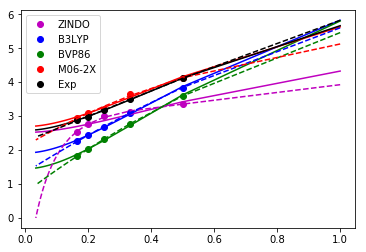

In [29]:
#plt.figure(figsize=(10,8))
xx=np.arange(1,30)

plt.plot(1/x,ySol0,'mo')
plt.plot(1/x,ySol1,'bo')
plt.plot(1/x,ySol2,'go')
plt.plot(1/x,ySol3,'ro')
plt.plot(1/x,ySolExp,'ko')
plt.legend(['ZINDO','B3LYP','BVP86','M06-2X','Exp'])

plt.plot(1/xx,fun1(xx,*poptSol01),'m')
plt.plot(1/xx,fun1(xx,*poptSol11),'b')
plt.plot(1/xx,fun1(xx,*poptSol21),'g')
plt.plot(1/xx,fun1(xx,*poptSol31),'r')
plt.plot(1/xx,fun1(xx,*poptSolExp1),'k')

plt.plot(1/xx,fun2(xx,*poptSol02),'m--')
plt.plot(1/xx,fun2(xx,*poptSol12),'b--')
plt.plot(1/xx,fun2(xx,*poptSol22),'g--')
plt.plot(1/xx,fun2(xx,*poptSol32),'r--')
plt.plot(1/xx,fun2(xx,*poptSolExp2),'k--')

#plt.savefig('abs1.eps',format='eps')
plt.show()

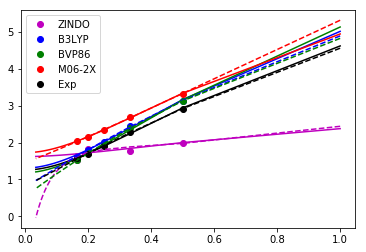

In [37]:
#plt.figure(figsize=(10,8))
xx=np.arange(1,30)

plt.plot(1/x,ycaSol0,'mo')
plt.plot(1/x,ycaSol1,'bo')
plt.plot(1/x,ycaSol2,'go')
plt.plot(1/x,ycaSol3,'ro')
plt.plot(1/x,ycaSolExp,'ko')
plt.legend(['ZINDO','B3LYP','BVP86','M06-2X','Exp'])

plt.plot(1/xx,fun1(xx,*poptcaSol01),'m')
plt.plot(1/xx,fun1(xx,*poptcaSol11),'b')
plt.plot(1/xx,fun1(xx,*poptcaSol21),'g')
plt.plot(1/xx,fun1(xx,*poptcaSol31),'r')
plt.plot(1/xx,fun1(xx,*poptcaSolExp1),'k')


plt.plot(1/xx,fun2(xx,*poptcaSol02),'m--')
plt.plot(1/xx,fun2(xx,*poptcaSol12),'b--')
plt.plot(1/xx,fun2(xx,*poptcaSol22),'g--')
plt.plot(1/xx,fun2(xx,*poptcaSol32),'r--')
plt.plot(1/xx,fun2(xx,*poptcaSolExp2),'k--')
#plt.savefig('ca1.eps',format='eps')
plt.show()

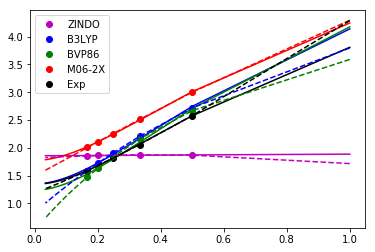

In [32]:
#plt.figure(figsize=(10,8))
xx=np.arange(1,30)

plt.plot(1/x,yanSol0,'mo')
plt.plot(1/x,yanSol1,'bo')
plt.plot(1/x,yanSol2,'go')
plt.plot(1/x,yanSol3,'ro')
plt.plot(1/xs,yanSolExp,'ko')
plt.legend(['ZINDO','B3LYP','BVP86','M06-2X','Exp'])

plt.plot(1/xx,fun1(xx,*poptanSol01),'m')
plt.plot(1/xx,fun1(xx,*poptanSol11),'b')
plt.plot(1/xx,fun1(xx,*poptanSol21),'g')
plt.plot(1/xx,fun1(xx,*poptanSol31),'r')
plt.plot(1/xx,fun1(xx,*poptanSolExp1),'k')

plt.plot(1/xx,fun2(xx,*poptanSol02),'m--')
plt.plot(1/xx,fun2(xx,*poptanSol12),'b--')
plt.plot(1/xx,fun2(xx,*poptanSol22),'g--')
plt.plot(1/xx,fun2(xx,*poptanSol32),'r--')
plt.plot(1/xx,fun2(xx,*poptanSolExp2),'k--')

#plt.savefig('an1.eps',format='eps')
plt.show()

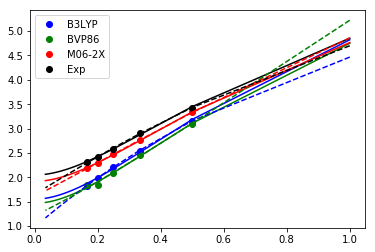

In [38]:
#plt.figure(figsize=(10,8))
xx=np.arange(1,30)

plt.plot(1/x,yemSol1,'bo')
plt.plot(1/x,yemSol2,'go')
plt.plot(1/x,yemSol3,'ro')
plt.plot(1/x,yemSolExp,'ko')
plt.legend(['B3LYP','BVP86','M06-2X','Exp'])

plt.plot(1/xx,fun1(xx,*poptemSol11),'b')
plt.plot(1/xx,fun1(xx,*poptemSol21),'g')
plt.plot(1/xx,fun1(xx,*poptemSol31),'r')
plt.plot(1/xx,fun1(xx,*poptemSolExp1),'k')

plt.plot(1/xx,fun2(xx,*poptemSol12),'b--')
plt.plot(1/xx,fun2(xx,*poptemSol22),'g--')
plt.plot(1/xx,fun2(xx,*poptemSol32),'r--')
plt.plot(1/xx,fun2(xx,*poptemSolExp2),'k--')

#plt.savefig('em1.eps',format='eps')
plt.show()

In [12]:
np.set_printoptions(precision=2)

In [13]:
poptSol01,poptSol02,poptSol11,poptSol12,poptSol21,poptSol22,poptSol31,poptSol32,poptSolExp1,poptSolExp2

(array([ 2.52,  1.81]),
 array([ -2.08,  79.03,   5.35]),
 array([ 1.91,  3.91]),
 array([ 1.33,  7.14,  0.6 ]),
 array([ 1.44,  4.36]),
 array([ 0.73,  7.74,  0.68]),
 array([ 2.69,  2.94]),
 array([ 2.11,  7.57,  0.72]),
 array([ 2.57,  3.09]),
 array([ 2.26,  5.74,  0.4 ]))

In [14]:
poptcaSol01,poptcaSol02,poptcaSol11,poptcaSol12,poptcaSol21,poptcaSol22,poptcaSol31,poptcaSol32,poptcaSolExp1,poptcaSolExp2

(array([ 1.62,  0.76]),
 array([ -1.75,  69.52,   6.54]),
 array([ 1.31,  3.71]),
 array([ 0.79,  6.07,  0.58]),
 array([ 1.18,  3.95]),
 array([ 0.54,  6.92,  0.69]),
 array([ 1.73,  3.22]),
 array([ 1.45,  4.74,  0.33]),
 array([ 1.26,  3.37]),
 array([ 0.81,  5.42,  0.54]))

In [15]:
poptanSol01,poptanSol02,poptanSol11,poptanSol12,poptanSol21,poptanSol22,poptanSol31,poptanSol32,poptanSolExp1,poptanSolExp2

(array([ 1.86,  0.03]),
 array([ 1.82,  2.11,  0.57]),
 array([ 1.35,  2.79]),
 array([ 0.84,  5.77,  0.74]),
 array([ 1.24,  2.94]),
 array([ 0.51,  7.36,  1.02]),
 array([ 1.77,  2.47]),
 array([ 1.49,  4.51,  0.45]),
 array([ 1.35,  2.46]),
 array([ 1.19,  3.35,  0.25]))

In [16]:
poptemSol11,poptemSol12,poptemSol21,poptemSol22,poptemSol31,poptemSol32,poptemSolExp1,poptemSolExp2

(array([ 1.55,  3.27]),
 array([ 0.98,  6.54,  0.71]),
 array([ 1.47,  3.28]),
 array([ 1.21,  4.41,  0.3 ]),
 array([ 1.92,  2.85]),
 array([ 1.61,  4.98,  0.43]),
 array([ 2.05,  2.81]),
 array([ 1.65,  5.67,  0.55]))

In [17]:
perrSol01,perrSol02,perrSol11,perrSol12,perrSol21,perrSol22,perrSol31,perrSol32,perrSolExp1,perrSolExp2

(array([ 0.12,  0.43]),
 array([  1.93,  51.82,   1.59]),
 array([ 0.03,  0.12]),
 array([ 0.03,  0.23,  0.04]),
 array([ 0.04,  0.16]),
 array([ 0.03,  0.21,  0.03]),
 array([ 0.06,  0.2 ]),
 array([ 0.31,  2.2 ,  0.34]),
 array([ 0.01,  0.04]),
 array([ 0.03,  0.21,  0.04]))

In [18]:
perrcaSol01,perrcaSol02,perrcaSol11,perrcaSol12,perrcaSol21,perrcaSol22,perrcaSol31,perrcaSol32,perrcaSolExp1,perrcaSolExp2

(array([ 0.14,  0.48]),
 array([   4.79,  156.57,    5.94]),
 array([ 0.03,  0.1 ]),
 array([ 0.07,  0.48,  0.09]),
 array([ 0.04,  0.14]),
 array([ 0.02,  0.12,  0.02]),
 array([ 0.01,  0.05]),
 array([ 0.09,  0.55,  0.12]),
 array([ 0.02,  0.09]),
 array([ 0.07,  0.44,  0.09]))

In [19]:
perranSol01,perranSol02,perranSol11,perranSol12,perranSol21,perranSol22,perranSol31,perranSol32,perranSolExp1,perranSolExp2

(array([ 0.01,  0.03]),
 array([ 0.04,  0.26,  0.14]),
 array([ 0.03,  0.12]),
 array([ 0.02,  0.12,  0.02]),
 array([ 0.05,  0.18]),
 array([ 0.02,  0.16,  0.03]),
 array([ 0.01,  0.05]),
 array([ 0.05,  0.3 ,  0.07]),
 array([ 0.01,  0.02]),
 array([ 0.01,  0.04,  0.01]))

In [20]:
perremSol11,perremSol12,perremSol21,perremSol22,perremSol31,perremSol32,perremSolExp1,perremSolExp2

(array([ 0.04,  0.13]),
 array([ 0.02,  0.15,  0.03]),
 array([ 0.04,  0.16]),
 array([ 0.28,  1.57,  0.36]),
 array([ 0.01,  0.05]),
 array([ 0.04,  0.27,  0.06]),
 array([ 0.03,  0.09]),
 array([ 0.09,  0.6 ,  0.12]))

In [72]:
VacSolData=np.genfromtxt("OT.txt")
x=np.array([2,3,4,5,6,10])

ySol3=np.concatenate((VacSolData[3,:],[2.7535]))
yemSol3=np.concatenate((VacSolData[17,:],[2.0456]))

In [73]:
poptSol31,pcovSol31=curve_fit(fun1,x,ySol3)
poptSol32,pcovSol32=curve_fit(fun2,x,ySol3)

poptemSol31,pcovemSol31=curve_fit(fun1,x,yemSol3)
poptemSol32,pcovemSol32=curve_fit(fun2,x,yemSol3)

perrSol31=np.sqrt(np.diag(pcovSol31))
perrSol32=np.sqrt(np.diag(pcovSol32))

perremSol31=np.sqrt(np.diag(pcovemSol31))
perremSol32=np.sqrt(np.diag(pcovemSol32))

In [77]:
poptSol31,poptSol32,poptemSol31,poptemSol32

(array([ 2.666,  3.006]),
 array([ 2.358,  6.024,  0.472]),
 array([ 1.923,  2.831]),
 array([ 1.77 ,  4.098,  0.239]))

In [75]:
perrSol31,perrSol32,perremSol31,perremSol32

(array([ 0.04,  0.16]),
 array([ 0.13,  0.94,  0.18]),
 array([ 0.01,  0.04]),
 array([ 0.06,  0.36,  0.09]))

In [76]:
np.set_printoptions(precision=3)